In [115]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

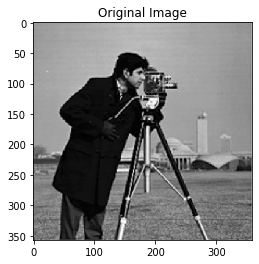

In [116]:
#Read image
img = cv.imread('person_1.png', 0)
plt.imshow(img, "gray")
plt.title("Original Image")
plt.show()

In [117]:
#Create a gaussian filter kernel
def gaussian_kernel(N=5, sigma=1):
    kernel = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            kernel[i,j] = np.exp(-((i-N//2)**2+(j-N//2)**2)/(2*sigma**2))
    return kernel
# print(gaussian_kernel())

#Impulse kernel
def impulse_kernel(N=5):
    kernel = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i == j and i>N//2 and j>N//2:
                kernel[i,j] = 1


    return kernel

# print(impulse_kernel())

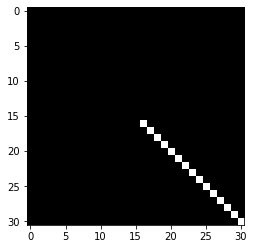

In [118]:
# gauss_kernel = gaussian_kernel(5, 1)
gauss_kernel = impulse_kernel(31)
plt.imshow(gauss_kernel, "gray");plt.show()

#Calculate padding size
a = int(img.shape[0]//2 - gauss_kernel.shape[0]//2)

#Generate padding for kernel
gauss_kernel_pad = np.pad(gauss_kernel, (a,a-1), 'constant', constant_values=(0))

#Resize image to kernel size
img = cv.resize(img,(gauss_kernel_pad.shape[0],gauss_kernel_pad.shape[0]))

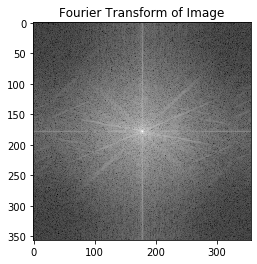

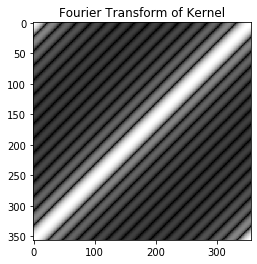

In [119]:
#Fourier transform of image and kernel
img_fft = np.fft.fft2(img)
gauss_kernel_fft = np.fft.fft2(gauss_kernel_pad)

plt.imshow(np.fft.fftshift(np.log(np.abs(img_fft)+1)), "gray")
plt.title("Fourier Transform of Image")
plt.show()

plt.imshow(np.fft.fftshift(np.log(np.abs(gauss_kernel_fft)+1)), "gray")
plt.title("Fourier Transform of Kernel")
plt.show()

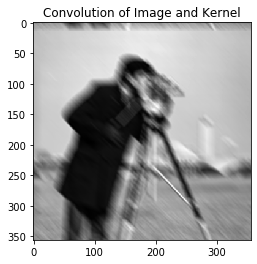

In [120]:
#Convolute image and kernel
img_conv = np.multiply(img_fft, gauss_kernel_fft)

plt.imshow(np.fft.fftshift(np.real(np.fft.ifft2(img_conv))), "gray")
plt.title("Convolution of Image and Kernel")
plt.show()

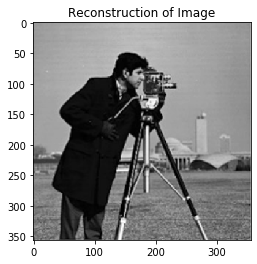

In [121]:
img_r = np.divide(img_conv, gauss_kernel_fft)

plt.imshow(np.real(np.fft.ifft2(img_r)), "gray")
plt.title("Reconstruction of Image")
plt.show()

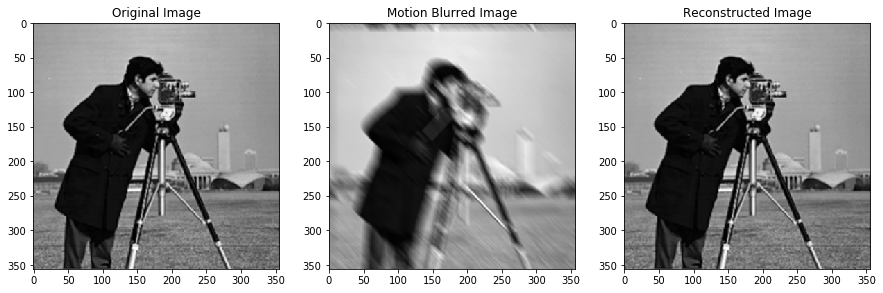

In [122]:
b_img = np.fft.fftshift(np.real(np.fft.ifft2(img_conv)))
r_img = np.real(np.fft.ifft2(img_r))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(131)
ax.imshow(img, "gray");ax.set_title("Original Image")
ax = fig.add_subplot(132)
ax.imshow(b_img, "gray");ax.set_title("Motion Blurred Image")
ax = fig.add_subplot(133)
ax.imshow(r_img, "gray");ax.set_title("Reconstructed Image")
plt.show()